## Running the model

In [1]:
import numpy as np

In [2]:
f1 = open("dataset3/german.data-numeric")

In [3]:
line = f1.readline()

In [4]:
dataset_tmp = []
dataset_tmp.append(line[:-1])

while line:
    line = f1.readline()
    
    if line == '':
        break
    
    dataset_tmp.append(line[:-1])

In [5]:
def custom_parser(text):
    
    k = []
    
    ftt = text[:-1].strip().split(" ")
    
    for i in ftt:
        if i!='':
            k.append(int(i))
    print(k)
    return k

In [6]:
print(len(dataset_tmp))

dataset = np.ndarray(shape=(1000,25))

for i in range(len(dataset_tmp)):
    asd = custom_parser(dataset_tmp[i])
    for j in range(len(asd)):
        dataset[i,j] = int(asd[j])
    
print(dataset.shape)

1000
[1, 6, 4, 12, 5, 5, 3, 4, 1, 67, 3, 2, 1, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]
[2, 48, 2, 60, 1, 3, 2, 2, 1, 22, 3, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2]
[4, 12, 4, 21, 1, 4, 3, 3, 1, 49, 3, 1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1]
[1, 42, 2, 79, 1, 4, 3, 4, 2, 45, 3, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
[1, 24, 3, 49, 1, 3, 3, 4, 4, 53, 3, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 2]
[4, 36, 2, 91, 5, 3, 3, 4, 4, 35, 3, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]
[4, 24, 2, 28, 3, 5, 3, 4, 2, 53, 3, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1]
[2, 36, 2, 69, 1, 3, 3, 2, 3, 35, 3, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]
[4, 12, 2, 31, 4, 4, 1, 4, 1, 61, 3, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1]
[2, 30, 4, 52, 1, 1, 4, 2, 3, 28, 3, 2, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2]
[2, 12, 2, 13, 1, 2, 2, 1, 3, 25, 3, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 2]
[1, 48, 2, 43, 1, 2, 2, 4, 2, 24, 3, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 2]
[2, 12, 2, 16, 1, 3, 2, 1, 3, 22, 3, 1, 1, 2, 1,

In [7]:
import pandas as pd
import numpy as np

In [8]:
dataset_np = dataset


In [9]:
classes = list(set(dataset_np[:,24]))
classes

[1.0, 2.0]

In [10]:
dataset_without_id = dataset_np
classes_dic = {}

tmp = dataset_without_id[:,24]

for i in tmp:
    if i not in classes_dic.keys():
        classes_dic[i] = 1
    else:
        classes_dic[i]+=1

In [11]:
classes_dic

{1.0: 700, 2.0: 300}

dict_keys([1.0, 2.0])
dict_values([700, 300])


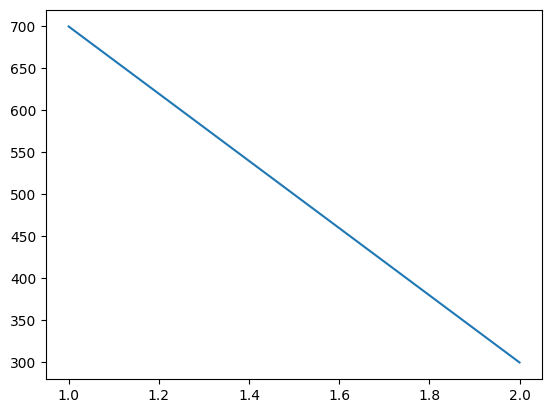

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = classes_dic.keys()
y = classes_dic.values()

print(x)
print(y)

plt.plot(x, y)
plt.show()

In [13]:
train_per = 60
val_per = 40
test_per = 100 - train_per
threshold = 5

In [14]:
classes_dic_data = {}

tmp = dataset_without_id[:,:]


for i in tmp:
    if i[24] not in classes_dic_data.keys():
        classes_dic_data[i[24]] = []
    
    classes_dic_data[i[24]].append(i)

In [15]:
for i in classes_dic_data.keys():
    print(i, len(classes_dic_data[i]))

1.0 700
2.0 300


In [16]:
import sklearn
import sklearn.model_selection

test = []
train = []
val = []


import random

for i in classes_dic_data.keys():
    
    print(i, len(classes_dic_data[i]))
    
    if len(classes_dic_data[i]) < threshold:
        
        for j in classes_dic_data[i]:
            train.append(j)
            
    else:

        train_tt, test_t = sklearn.model_selection.train_test_split(classes_dic_data[i], shuffle=True, test_size = test_per/100)
        
        train_t, val_t = sklearn.model_selection.train_test_split(train_tt, shuffle=True, test_size = val_per/100)
        
        for j in train_t:
            train.append(j)
        
        for j in test_t:
            test.append(j)
        
        for j in val_t:
            val.append(j)


1.0 700
2.0 300


In [17]:
print("Train",len(train))
print("Test",len(test)) 
print("Val",len(val))
print("Total", len(train)+len(test)+len(val)) # 2916697

Train 360
Test 400
Val 240
Total 1000


In [18]:
train = np.array(train)
test = np.array(test)
val = np.array(val)

In [19]:
train_X = np.delete(train,24,axis=1)
train_y = train[:,24]
test_X = np.delete(test,24,axis=1)
test_y = test[:,24]
val_X = np.delete(val,24,axis=1)
val_y = val[:,24]

In [21]:
train_X = train_X.astype("int32")
train_y = train_y.astype("int32")
test_X = test_X.astype("int32")
test_y = test_y.astype("int32")
val_X = val_X.astype("int32")
val_y = val_y.astype("int32")

In [22]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


print(device)



from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor

clf = TabNetClassifier(device_name=device)

clf.fit(
      train_X, 
      train_y,
      eval_set=[(val_X, val_y)],
      max_epochs = 5
)

preds = clf.predict(test_X)

/home/srajat/anaconda3/envs/col865/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


cpu
Device used : cpu
epoch 0  | loss: 1.45282 | val_0_auc: 0.42857 |  0:00:00s
epoch 1  | loss: 1.08247 | val_0_auc: 0.46466 |  0:00:00s
epoch 2  | loss: 0.91682 | val_0_auc: 0.5959  |  0:00:00s
epoch 3  | loss: 0.67936 | val_0_auc: 0.56477 |  0:00:00s
epoch 4  | loss: 0.63104 | val_0_auc: 0.61677 |  0:00:00s
Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_val_0_auc = 0.61677
Best weights from best epoch are automatically used!


### 1. training the model

In [23]:
print(clf.predict([test_X[0]]))
print(test_y[0])

[1]
1


### 2. testing the model

In [24]:
true_res = 0

res = clf.predict(test_X)

In [25]:
res

array([1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,

In [26]:
for i in range(res.shape[0]):
    if(res[i] == test_y[i]):
        true_res +=1

accuracy = true_res/test_X.shape[0]
print(accuracy)

0.68


### checking if we get right

In [31]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools
    
    

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5,5))
    #plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.savefig("fig_d3_tabnet.png")
    plt.show()

In [32]:
classes = list(set(test_y))

dic = {}
for i in range(len(classes)):
    dic[classes[i]] = i

cnf_array = []
for i in range(len(classes)):
    cnf_array.append([0]*len(classes))

for i in range(res.shape[0]):
    cnf_array[dic[test_y[i]]][dic[res[i]]]+=1

In [33]:
print(cnf_array)

[[223, 57], [71, 49]]


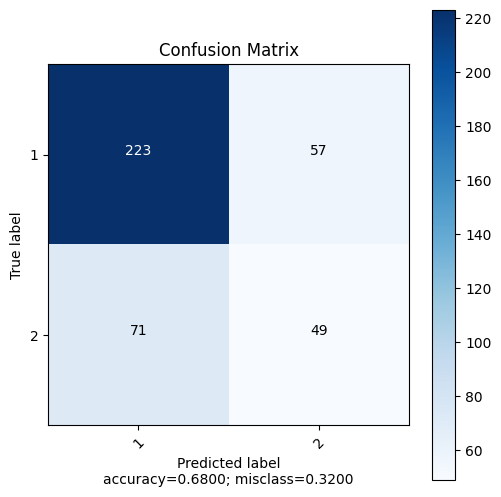

In [34]:
plot_confusion_matrix(cm= np.array(cnf_array), 
                      normalize    = False,
                      target_names = classes,
                      title        = "Confusion Matrix")